# MUT19 TOTW Analysis
- Elite and Gold TOTW Players

TODO:
- get team records

In [1]:
%matplotlib inline
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import seaborn as sns
import urllib
import pandas as pd
import requests
import warnings; warnings.simplefilter('ignore')  
import time
import re

### Helper Functions

In [7]:
# 
def get_player(player_raw):
    try:
        player_team = str(player_raw.find('span', class_='team-logo')).split(' ')[2].split('"')[0]
    except:
        player_team = '-'
    try:
        player_name = player_raw.find('a').contents[0].strip('\n').lstrip().split('\n')[0]
        print(player_name)
    except:
        player_name = '-'
    try:
        price_link = str(player_raw.find('a', class_='player-price tip')).split('"')[3]
    except:
        price_link = '-'
    try:
        ovr = player_raw.find('td', class_='col-overall').contents[0]
    except: 
        ovr = '-'
    try:
        pos = player_raw.find('td', class_='col-position').contents[0]
    except:
        pos = '-'
    
    return {'name': player_name,
            'team': player_team,
            'ovr': ovr,
            'pos': pos,
            'price_link': price_link}

# 
def list_to_df(players):
    df = pd.DataFrame(players)
    df = df[ df['name']!='-']
    df['team'] = df['team'].str.upper()
    df['ovr'] = df['ovr'].astype(int)
    return df

# 
def get_players(tier, start=1, n_pages=1):
    players = []
    
    for i in range(start, n_pages + 1):
        try:
            if tier.lower() == 'e':
                url = f'https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page={i}'
            else:
                url = f'https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=8&page={i}'

            print('url', url)
            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'lxml')
            table = soup.find('table')
            for j in range(1, len(table.find('tbody').contents)):
                time.sleep(2)
                player_raw = table.find('tbody').contents[j]
                players.append(get_player(player_raw))
        except ConnectionError:
            print('connection error', url, 'i:', i)
            return list_to_df(players)
    return list_to_df(players)

**Need: number of pages for each page:**
- elite: https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=1
- gold: https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=8&page=1

TODO:
- better way to do this without specifying pages

In [3]:
elite_pages = 8
gold_pages = 3

### Elite

In [9]:
elitesA = get_players(tier='e', start=1, n_pages=5)
elitesA.to_csv('totw_elite_a_jan2.csv')

url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=1
Amari Cooper
Khalil Mack
Bobby Wagner
Keenan Allen
Anthony Barr
Derrick Henry
T.Y. Hilton
Malcolm Jenkins
Adrian Amos
Jared Goff
Melvin Gordon
Darius Leonard
Cam Newton
Geno Atkins
DeForest Buckner
Kirk Cousins
Kyle Fuller
Akiem Hicks
Matthew Judon
George Kittle
Marlon Mack
Devin McCourty
Alec Ogletree
Dak Prescott
Robert Woods
url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=2
James Conner
Danielle Hunter
Aaron Jones
Whitney Mercilus
Josh Norman
Adrian Peterson
Sheldon Rankins
Matt Ryan
James White
Wesley Woodyard
Kevin Byard
Brandin Cooks
Micah Hyde
Melvin Ingram
Myles Jack
Patrick Mahomes
Christian McCaffrey
Emmanuel Sanders
Adam Thielen
T.J. Watt
Tyreek Hill
Terrell Suggs
Dalvin Cook
Jared Cook
Amari Cooper
url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=3
Kyle Fuller
Bruce Irvin
Eric Kend

In [10]:
elitesB = get_players(tier='e', start=6, n_pages=elite_pages)
elitesB.to_csv('totw_elite_b_jan2.csv')

url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=6
Dee Ford
Javon Hargrave
Austin Hooper
Duke Johnson Jr
Desmond King
Tyquan Lewis
Vance McDonald
Dante Pettis
D.J. Reed
Josh Rosen
Jaylen Samuels
Jaylon Smith
Roquan Smith
Courtland Sutton
Trae Waynes
Tyrell Williams
Mike Adams
Cole Beasley
Brandon Carr
Morris Claiborne
Keelan Cole
Isaiah Crowell
Dante Fowler Jr
Eddie Jackson
Derwin James
url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=7
Phillip Lindsay
Tyler Lockett
Marlon Mack
Steven Nelson
Adrian Peterson
Jarran Reed
Calvin Ridley
Curtis Samuel
Kyle Van Noy
P.J. Williams
T.J. Yeldon
Denico Autry
Chris Banjo
Matt Breida
Anthony Brown
Jaron Brown
John Brown
Josh Bynes
Garrett Celek
Gareon Conley
Phillip Dorsett
Antonio Gates
Corey Graham
Anthony Harris
Neville Hewitt
url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=8
Mike Hughes
Adam Humphries


In [ ]:
elites = pd.concat([elitesA, elitesB])
elites.to_csv('totw_elite_jan2.csv')

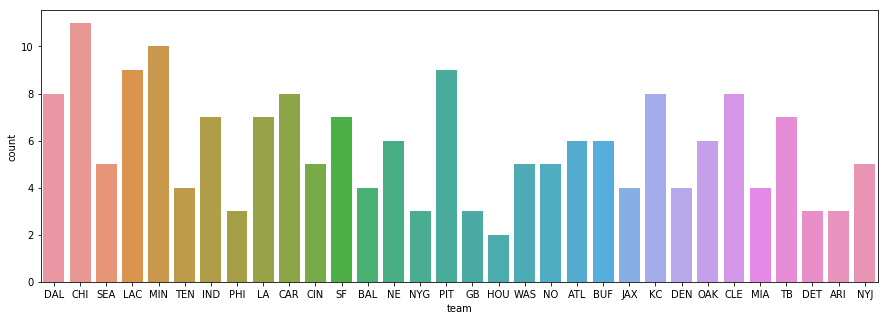

In [28]:
plt.figure(figsize=(15, 5))
sns.countplot(elites['team']);

### Gold

In [11]:
golds = get_players('g', n_pages=gold_pages)
golds.to_csv('totw_gold_jan2.csv')

url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=8&page=1
Josh Adams
Bashaud Breeland
Ed Dickson
Chase Edmonds
Gus Edwards
Maurice Harris
Gerald Hodges Jr
Sam Hubbard
Justin Jackson
Tom Johnson
Zay Jones
Carl Nassib
Robert Nkemdiche
Zach Pascal
Justin Reid
Greg Stroman
Leighton Vander Esch
Benjamin Watson
B.W. Webb
Albert Wilson
Kiko Alonso
Tyler Boyd
Nick Chubb
James Conner
Jordan Evans
url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=8&page=2
Clayton Fejedelem
L.J. Fort
Jakeem Grant
Ryan Griffin
C. Herndon IV
Donte Jackson
Jayron Kearse
Aaron Lynch
Cassius Marsh
Nick Mullens
Josh Reynolds
Michael Roberts
Isaac Rochell
Jonnu Smith
Za'Darius Smith
Tavon Austin
Bene' Benwikere
Daniel Brown
Jayon Brown
Keke Coutee
Dallas Goedert
Rashard Higgins
Wes Horton
Richie James
Elijah Lee
url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=8&page=3
Phillip Lindsay
Cory Littleton
Rom

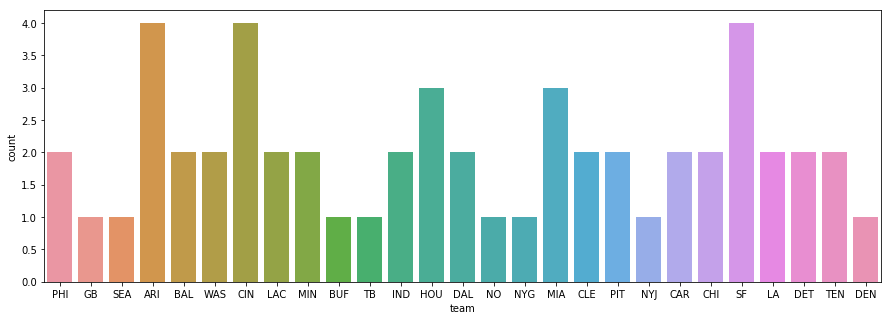

In [29]:
plt.figure(figsize=(15, 5))
sns.countplot(golds['team']);

In [30]:
df = pd.concat([elites, golds])

### All TOTW Players

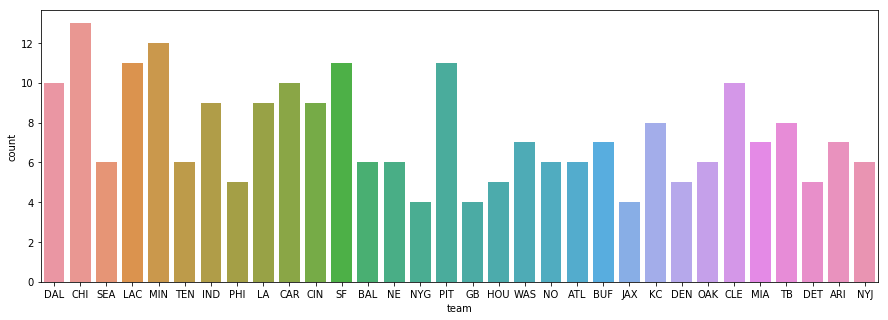

In [35]:
plt.figure(figsize=(15, 5))
sns.countplot(df['team']);

## NFL Standings

In [36]:
afc_path = '/Users/mattjohnson/PycharmProjects/MUT19/afc_standings.csv'
nfc_path = '/Users/mattjohnson/PycharmProjects/MUT19/nfc_standings.csv'
afc = pd.read_csv(afc_path)
nfc = pd.read_csv(nfc_path)
standings = pd.concat([afc, nfc])

In [85]:
#standings.sort_values('W', ascending=False)
teams = pd.read_csv('nfl_teams.csv')
teams.set_index('Name', drop=True, inplace=True)
team_dict = teams['Abbreviation'].to_dict()

standings['abbrev'] = standings['Tm'].map(team_dict)

In [87]:
#
abbrevs1 = set(df['team'].unique())
abbrevs2 = set(standings['abbrev'].unique())
print(len(abbrevs1), '-', len(abbrevs2))
abbrevs1 == abbrevs2

32 - 32


True

In [91]:
team_count_dict = df['team'].value_counts().to_dict()

In [93]:
standings['count'] = standings['abbrev'].map(team_count_dict)

In [135]:
all_df = standings[['Tm', 'W', 'PF', 'PA', 'PD', 'abbrev', 'count']]
all_df.sort_values('W', ascending=False, inplace=True)

In [120]:
def tidy(df):
    try:
        df = df[['abbrev', 'W', 'count']]
    except:
        print('xx')
        return []
    if len(df.columns) != 3:
        print('x')
        return []
    tidy = (
    df.set_index('abbrev')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
    )
    return tidy

In [136]:
tidied = tidy(all_df)

In [129]:
#def set_palette(self):
team_palette = {'PHI': 'xkcd:green', 'NE': 'darkblue', 'NO': 'gold', 'GB': 'green', 'MIN': 'xkcd:purple',
                     'WAS': 'maroon', 'TEN': 'cyan', 'TB': 'xkcd:crimson', 'SEA': 'chartreuse',
                     'LAC': 'xkcd:azure', 'ATL': 'xkcd:red', 'BAL': 'indigo', 'LA': 'xkcd:khaki',
                     'KC': 'red', 'NYJ': 'darkgreen', 'JAX': 'xkcd:darkgreen', 'OAK': 'grey',
                     'BUF': 'xkcd:blue', 'CAR': 'aqua', 'CLE': 'chocolate', 'PIT': 'xkcd:yellow', 'NYG': 'blue',
                     'SF': 'xkcd:gold', 'CHI': 'xkcd:orange', 'DAL': 'xkcd:darkblue', 'MIA': 'xkcd:aqua',
                     'DEN': 'xkcd:orangered', 'HOU': 'xkcd:navy', 'ARI': 'xkcd:red', 'CIN': 'xkcd:orange',
                     'DET': 'xkcd:lightblue', 'IND': 'xkcd:azure'}

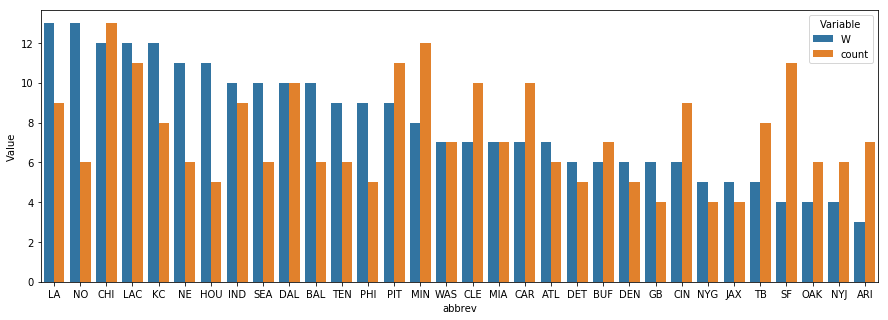

In [137]:
plt.figure(figsize=(15, 5))
sns.barplot(data=tidied, x='abbrev', y='Value', hue='Variable');

In [131]:
a = set(team_palette.keys())
b = set(all_df['abbrev'])

In [132]:
a==b

True